In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [33]:
from pandas_datareader import DataReader

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [10]:
from datetime import datetime


In [11]:
from __future__ import division


In [12]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [13]:
end = datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [32]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,"yahoo",start,end)

In [36]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,196.678208,192.897450,194.716494,194.866733,3.068458e+07,193.287451
std,25.274146,25.332131,25.233966,25.401057,1.275540e+07,25.923539
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,175.934998,173.555000,174.805000,174.794998,2.152470e+07,172.847198
50%,198.850006,193.820007,196.419998,197.000000,2.725300e+07,194.916260
75%,209.604996,207.095001,208.460007,208.705002,3.631565e+07,207.138733
max,262.470001,258.279999,258.739990,262.200012,9.574460e+07,262.200012


In [37]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-11-12 to 2019-11-11
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


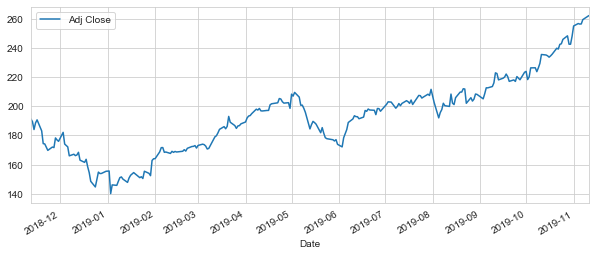

In [38]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

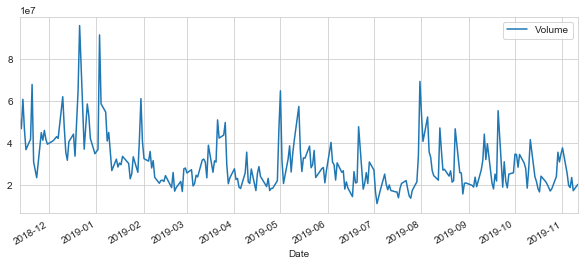

In [39]:
AAPL["Volume"].plot(legend=True,figsize=(10,4))

In [51]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days " %(str(ma))
    AAPL[column_name] = pd.Series.rolling(AAPL["Adj Close"],ma).mean()
    


In [52]:
#some key error occured
#AAPL[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(subplots=False,figsize=(10,4))

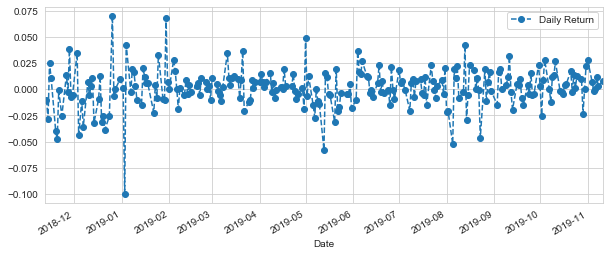

In [54]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()
AAPL["Daily Return"].plot(figsize=(10,4),legend=True,linestyle="--",marker="o")

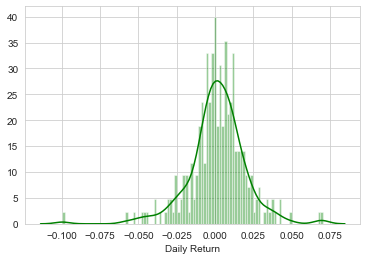

In [55]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="green")

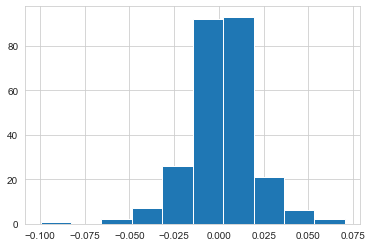

In [56]:
AAPL['Daily Return'].hist()

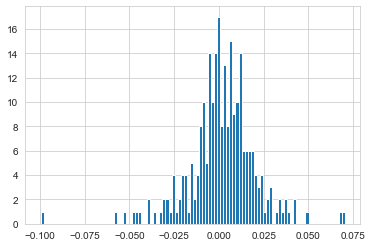

In [57]:
AAPL['Daily Return'].hist(bins=100)

In [58]:
closing_df = DataReader(tech_list,"yahoo",start,end)["Adj Close"]

In [59]:
  closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-12,191.295761,1038.630005,105.216652,1636.849976
2018-11-13,189.384476,1036.050049,105.285568,1631.170044
2018-11-14,184.034882,1043.660034,103.792503,1599.010010
2018-11-15,188.576630,1064.709961,106.076599,1619.439941
2018-11-16,190.665237,1061.489990,107.075256,1593.410034


In [60]:
tech_rets = closing_df.pct_change()

In [61]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-12,NaN,NaN,NaN,NaN
2018-11-13,-0.009991,-0.002484,0.000655,-0.003470
2018-11-14,-0.028247,0.007345,-0.014181,-0.019716
2018-11-15,0.024679,0.020169,0.022006,0.012777
2018-11-16,0.011076,-0.003024,0.009414,-0.016073


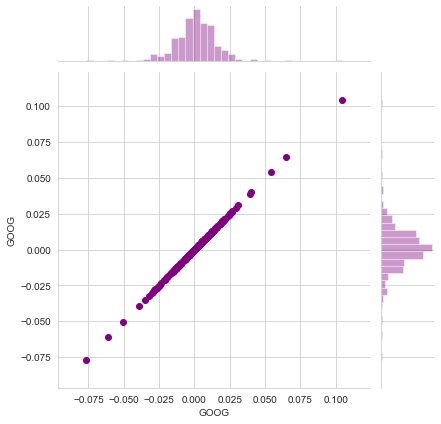

In [63]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color = 'purple')

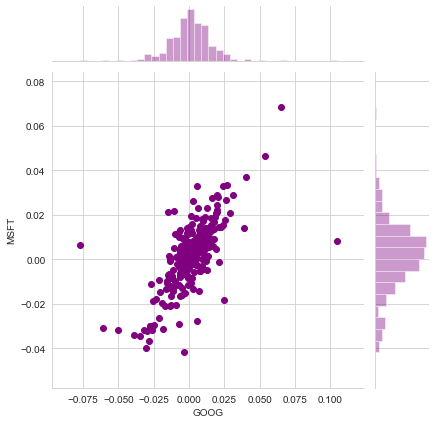

In [64]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter', color = 'purple')

In [65]:
# sort of lowly correlated 

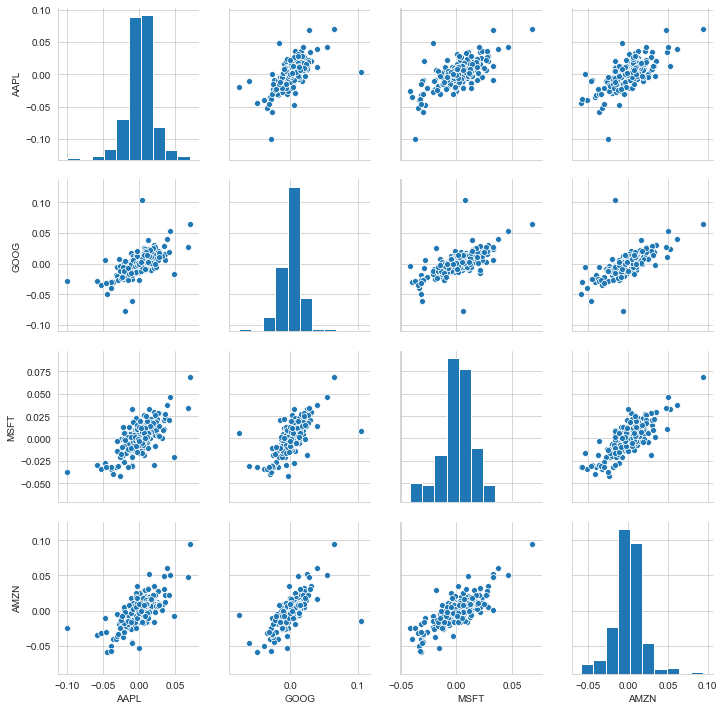

In [66]:
sns.pairplot(tech_rets.dropna())

In [67]:
#seems google and amazon are correlated

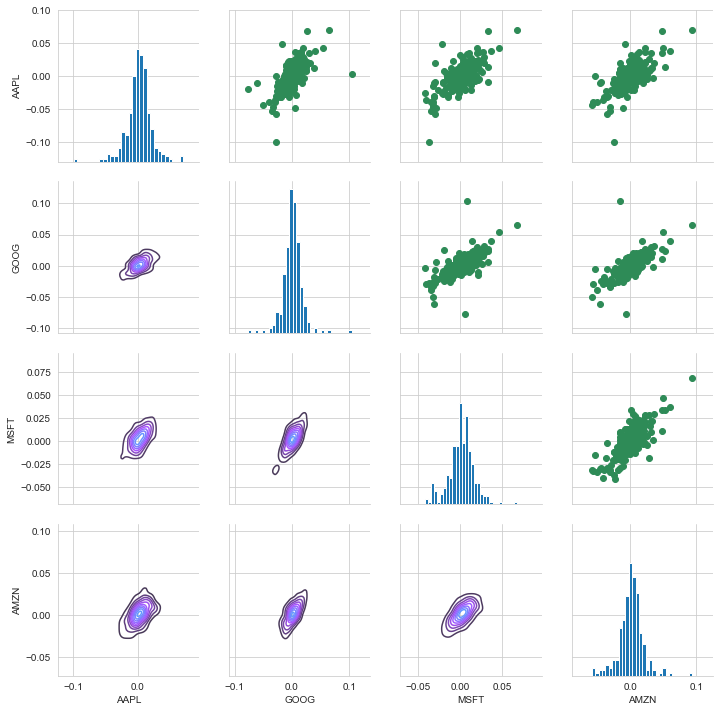

In [68]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color="seagreen")
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist,bins=30)


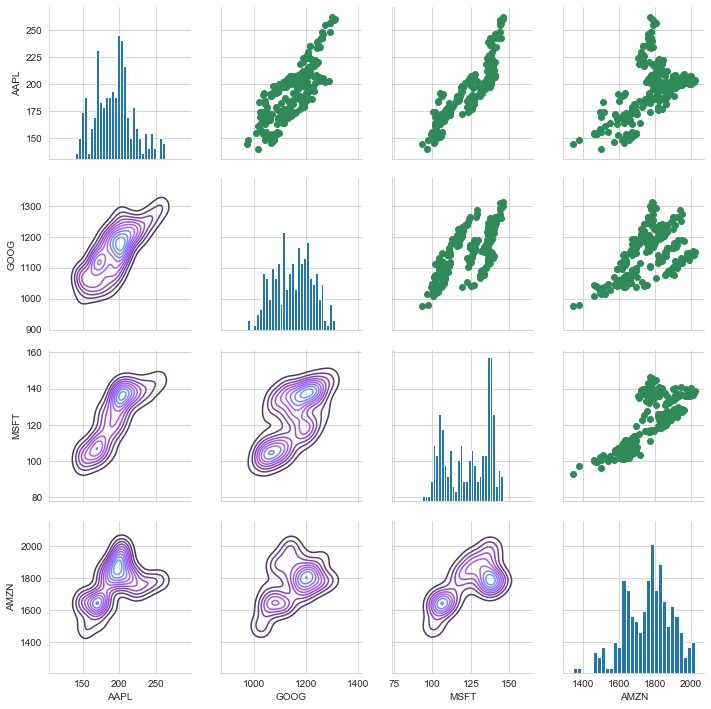

In [69]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color="seagreen")
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist,bins=30)


In [70]:
#correlation between apple and amazon

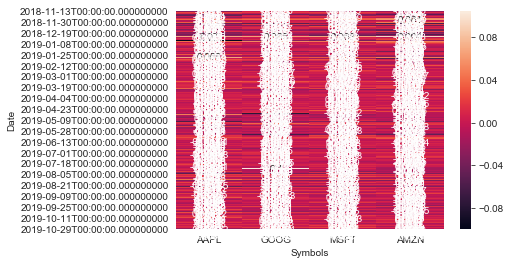

In [72]:
sns.heatmap(tech_rets.dropna(),annot=True)

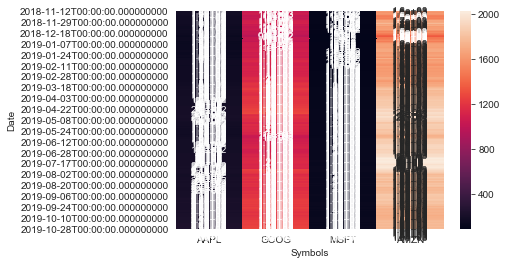

In [75]:
sns.heatmap(closing_df,annot=True)

In [76]:
#apple and microsoft are highly correlated and google and microsoft are collerated

In [77]:
#risk analysis

In [78]:
rets = tech_rets.dropna()

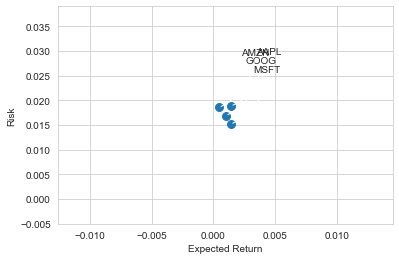

In [84]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext=(50,50),
        textcoords = 'offset points',ha='right',va ='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3')
    )

In [85]:
#highest risk is on amazon

In [86]:
#arrows are outputted white therefore seems invisible but in a better compiler may show better results

In [87]:
#value at risk analysis

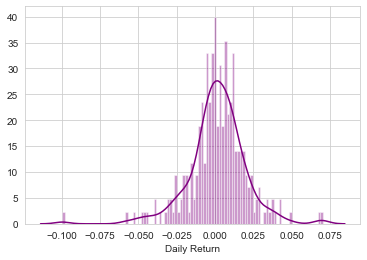

In [88]:
sns.distplot(AAPL["Daily Return"].dropna(),bins=100,color="purple")

In [89]:
rets["AAPL"].quantile(0.05)

-0.029082051203488245

In [90]:
#95 percent the maximum loss that may occur

In [91]:
days = 365
dt = 1/days
mu = rets.mean()["GOOG"]
sigma = rets.std()["GOOG"]

In [103]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]= mu*dt
        
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
                             
    return price
                            
                             
         

In [100]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-12,1062.119995,1031.000000,1061.390015,1038.630005,1471800,1038.630005
2018-11-13,1056.604980,1031.150024,1043.290039,1036.050049,1513700,1036.050049
2018-11-14,1054.563965,1031.000000,1050.000000,1043.660034,1565900,1043.660034
2018-11-15,1071.849976,1031.780029,1044.709961,1064.709961,1836100,1064.709961
2018-11-16,1067.000000,1048.979980,1059.410034,1061.489990,1658100,1061.489990


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

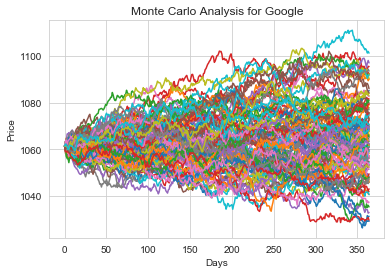

In [104]:
start_price = 1061.390015
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")


In [109]:
runs = 100
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

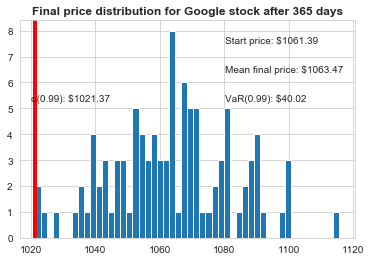

In [110]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=50)

#starting price
plt.figtext(0.6,0.8,s = "Start price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

#variance of the price (within 99%confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price-q,))

#display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

#plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#title
plt.title("Final price distribution for Google stock after %s days"%days,weight="bold")



In [111]:
#seems stable